# 그레이디언트 부스팅 (Gradient Boosting)

### 1. 필요한 Python 라이브러리 Import 하기

In [ ]:
# pandas와 numpy 임포트하기
import pandas as pd
import numpy as np

# 경고 끄기
import warnings

warnings.filterwarnings("ignore")

import xgboost as xgb

xgb.set_config(verbosity=0)

In [ ]:
df_bikes = pd.read_csv("bike_rentals_cleaned.csv")
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
# 데이터를 X와 y로 나눕니다.
X_bikes = df_bikes.iloc[:, :-1]
y_bikes = df_bikes.iloc[:, -1]

# train_test_split를 임포트합니다.
from sklearn.model_selection import train_test_split

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

### 2. DecisionTree를 활용한 그레이디언트 부스팅 모델 만들기

In [ ]:
# DecisionTreeRegressor를 임포트합니다.
from sklearn.tree import DecisionTreeRegressor

# DecisionTreeRegressor를 초기화합니다.
# gradient boosting은 결정 트리를 이용해 높은 정확도를 얻는 거이 아니라 오차를 통해 학습하는 모델을 원하기
# 때문에 앙상블의 첫번째 트리인 tree_1을 max_depth=2로 결정트리를 초기화
tree_1 = DecisionTreeRegressor(max_depth=2, random_state=2)

# 훈련 세트에 결정 트리를 훈련합니다.
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [ ]:
# 테스트 세트가 아니라 훈련 세트에 대한 예측을 만듭니다.
# 잔차를 계산하기 위해서 훈련 단계에서 예측과 타깃을 비교해야 하기 때문임
# 모델의 테스트 단계는 모든 트리를 구성한 후 마지막에 시행
y_train_pred = tree_1.predict(X_train)

In [7]:
# 잔차를 계산합니다.
y2_train = y_train - y_train_pred

# 새로운 DecisionTreeRegressor를 초기화합니다.
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=2)

# 잔차에 모델을 훈련합니다.
tree_2.fit(X_train, y2_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [ ]:
# 훈련 세트에 대한 예측을 만듭니다.
y2_train_pred = tree_2.predict(X_train)

# 잔차를 계산합니다.
y3_train = y2_train - y2_train_pred

# 새로운 DecisionTreeRegressor를 초기화합니다.
tree_3 = DecisionTreeRegressor(max_depth=2, random_state=2)

# 잔차에 모델을 훈련합니다.
tree_3.fit(X_train, y3_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [9]:
y1_pred = tree_1.predict(X_test)

y2_pred = tree_2.predict(X_test)

y3_pred = tree_3.predict(X_test)

y_pred = y1_pred + y2_pred + y3_pred

# mean_squared_error를 임포트합니다.
from sklearn.metrics import mean_squared_error as MSE

# 평균 제곱근 오차를 계산합니다.
MSE(y_test, y_pred) ** 0.5

911.0479538776444

### 3. 사이킷런으로 그레이디언트 부스팅 모델 만들기

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
gbr = GradientBoostingRegressor(
    max_depth=2, n_estimators=3, random_state=2, learning_rate=1.0
)

gbr.fit(X_train, y_train)

# 테스트 데이터에 대한 예측을 만듭니다.
y_pred = gbr.predict(X_test)

# 평균 제곱근 오차를 계산합니다.
MSE(y_test, y_pred) ** 0.5

911.0479538776439

In [35]:
gbr = GradientBoostingRegressor(
    max_depth=2, n_estimators=30, random_state=2, learning_rate=1.0
)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred) ** 0.5

857.1072323426944

In [36]:
gbr = GradientBoostingRegressor(
    max_depth=2, n_estimators=300, random_state=2, learning_rate=1.0
)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred) ** 0.5

936.3617413678853

In [ ]:
gbr = GradientBoostingRegressor(
    max_depth=2, n_estimators=300, random_state=2, learning_rate=0.1
)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred) ** 0.5

653.7456840231495

### 4. 그레이디언트 부스팅 매개변수 튜닝

### 4.1 learning_rate

In [40]:
learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]
for value in learning_rate_values:
    gbr = GradientBoostingRegressor(
        max_depth=2, n_estimators=300, random_state=2, learning_rate=value
    )
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred) ** 0.5
    print("학습률:", value, ", 점수:", rmse)

학습률: 0.001 , 점수: 1633.0261400367258
학습률: 0.01 , 점수: 831.5430182728547
학습률: 0.05 , 점수: 685.0192988749717
학습률: 0.1 , 점수: 653.7456840231495
학습률: 0.15 , 점수: 687.666134269379
학습률: 0.2 , 점수: 664.312804425697
학습률: 0.3 , 점수: 689.4190385930236
학습률: 0.5 , 점수: 693.8856905068778
학습률: 1.0 , 점수: 936.3617413678853


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

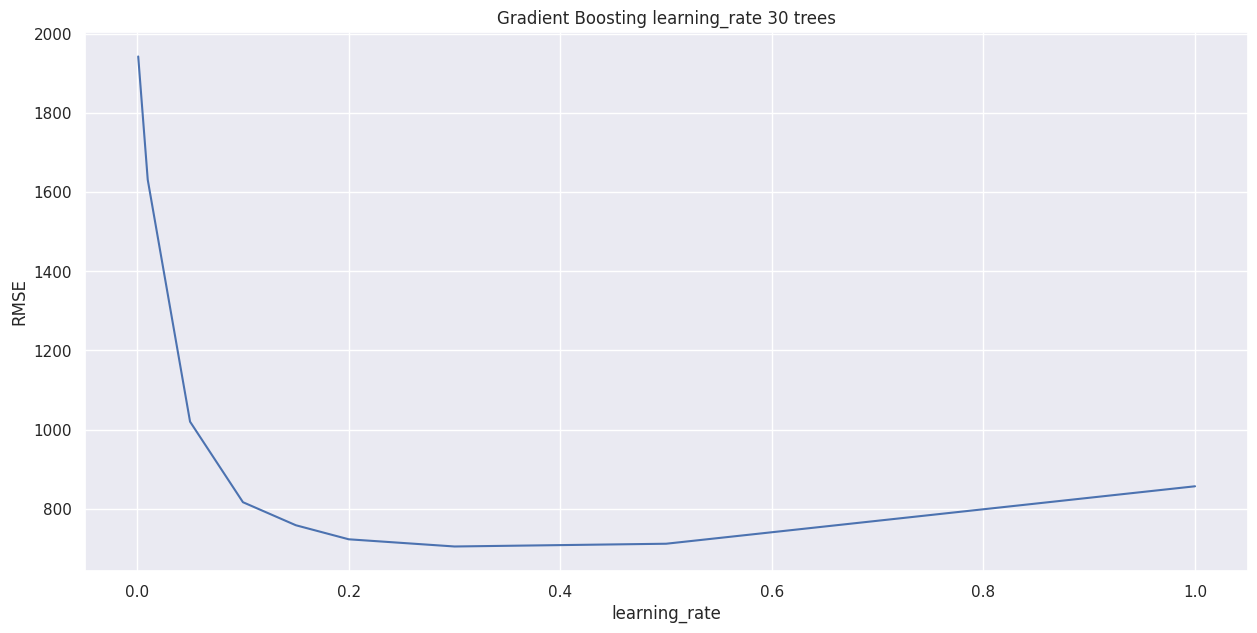

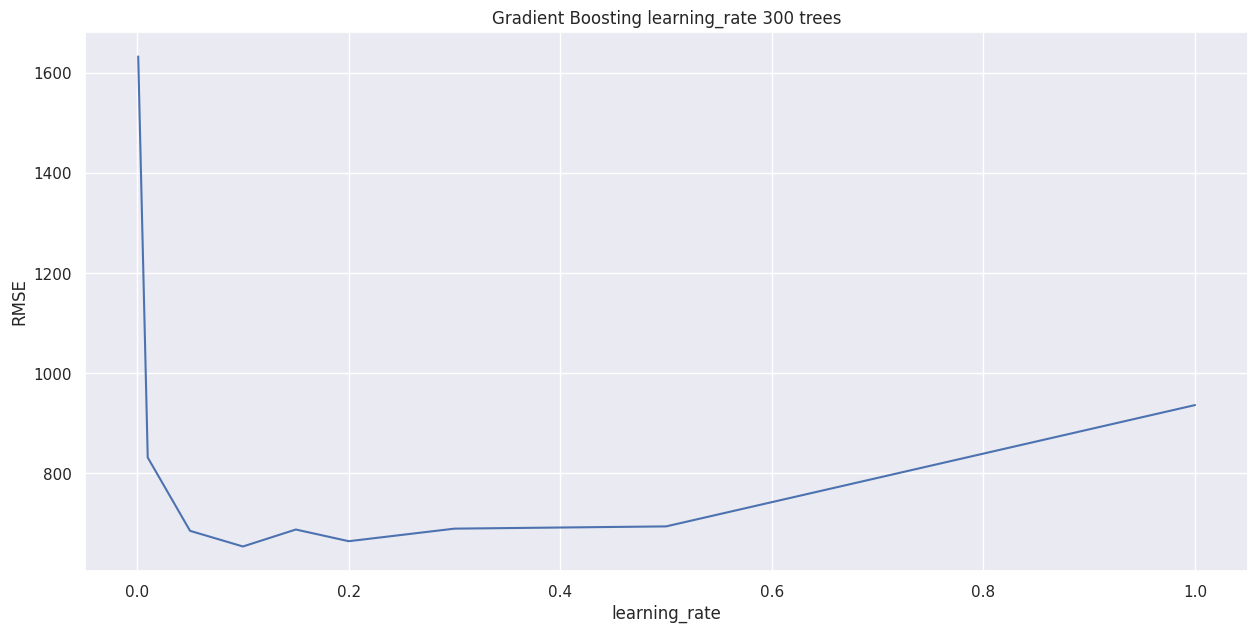

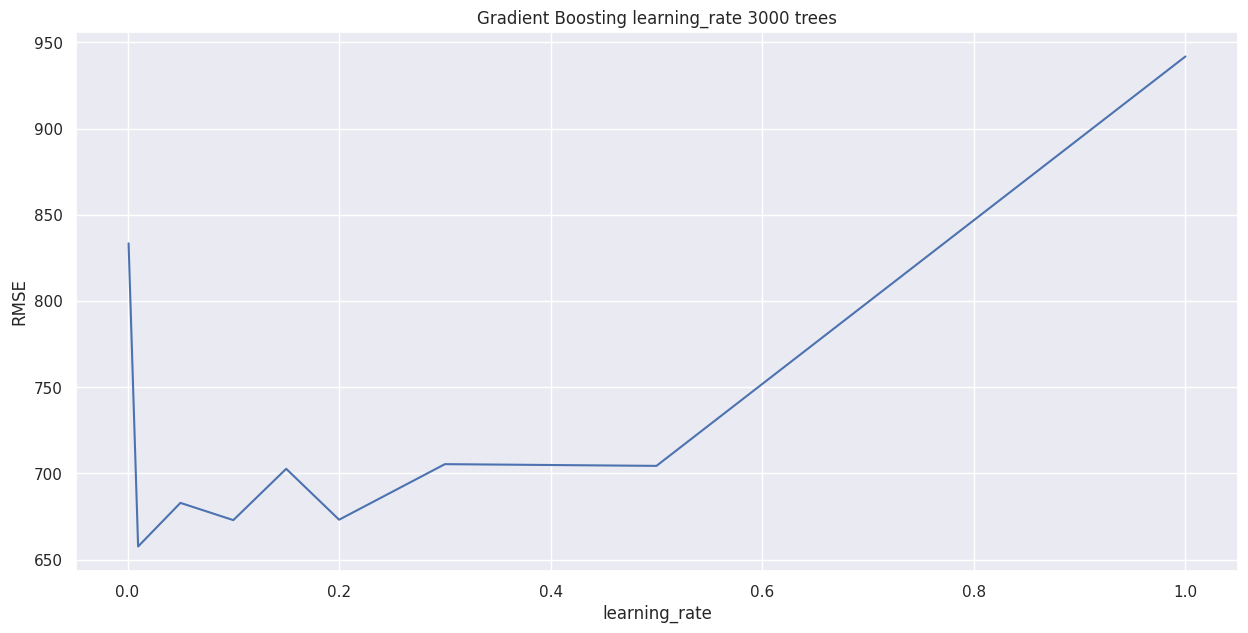

In [ ]:
from sklearn.metrics import mean_squared_error

for est in [30, 300, 3000]:
    rmse_scores = []
    for value in learning_rate_values:
        gbr = GradientBoostingRegressor(
            max_depth=2, n_estimators=est, random_state=2, learning_rate=value
        )
        gbr.fit(X_train, y_train)
        y_pred = gbr.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        rmse_scores.append(rmse)
    plt.figure(figsize=(15, 7))
    plt.plot(learning_rate_values, rmse_scores)
    plt.xlabel("learning_rate")
    plt.ylabel("RMSE")
    plt.title("Gradient Boosting learning_rate {} trees".format(est))
    plt.show()

### 4.2 기본 학습기

In [ ]:
depths = [None, 1, 2, 3, 4]
for depth in depths:
    gbr = GradientBoostingRegressor(max_depth=depth, n_estimators=300, random_state=2)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred) ** 0.5
    print("최대 깊이:", depth, ", 점수:", rmse)

최대 깊이: None , 점수: 869.2788645118395
최대 깊이: 1 , 점수: 707.8261886858736
최대 깊이: 2 , 점수: 653.7456840231495
최대 깊이: 3 , 점수: 646.4045923317708
최대 깊이: 4 , 점수: 663.048387855927


In [24]:
gbr.init_

DummyRegressor()

In [25]:
len(gbr.estimators_)

300

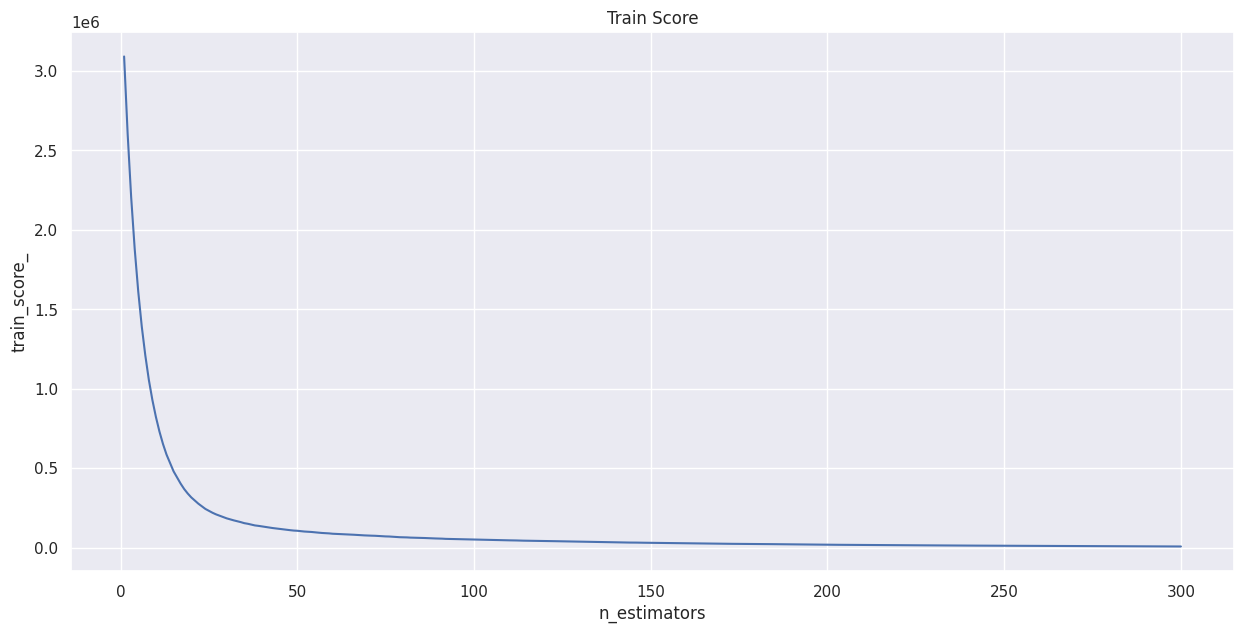

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(range(1, 301), gbr.train_score_)
plt.xlabel("n_estimators")
plt.ylabel("train_score_")
plt.title("Train Score")
plt.show()

### 4.3 subsample

In [ ]:
samples = [1, 0.9, 0.8, 0.7, 0.6, 0.5]
for sample in samples:
    gbr = GradientBoostingRegressor(
        max_depth=3, n_estimators=300, subsample=sample, random_state=2
    )
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred) ** 0.5
    print("subsample:", sample, ", 점수:", rmse)

subsample: 1 , 점수: 646.4045923317708
subsample: 0.9 , 점수: 620.1819001443569
subsample: 0.8 , 점수: 617.2355650565677
subsample: 0.7 , 점수: 612.9879156983139
subsample: 0.6 , 점수: 622.6385116402317
subsample: 0.5 , 점수: 626.9974073227554


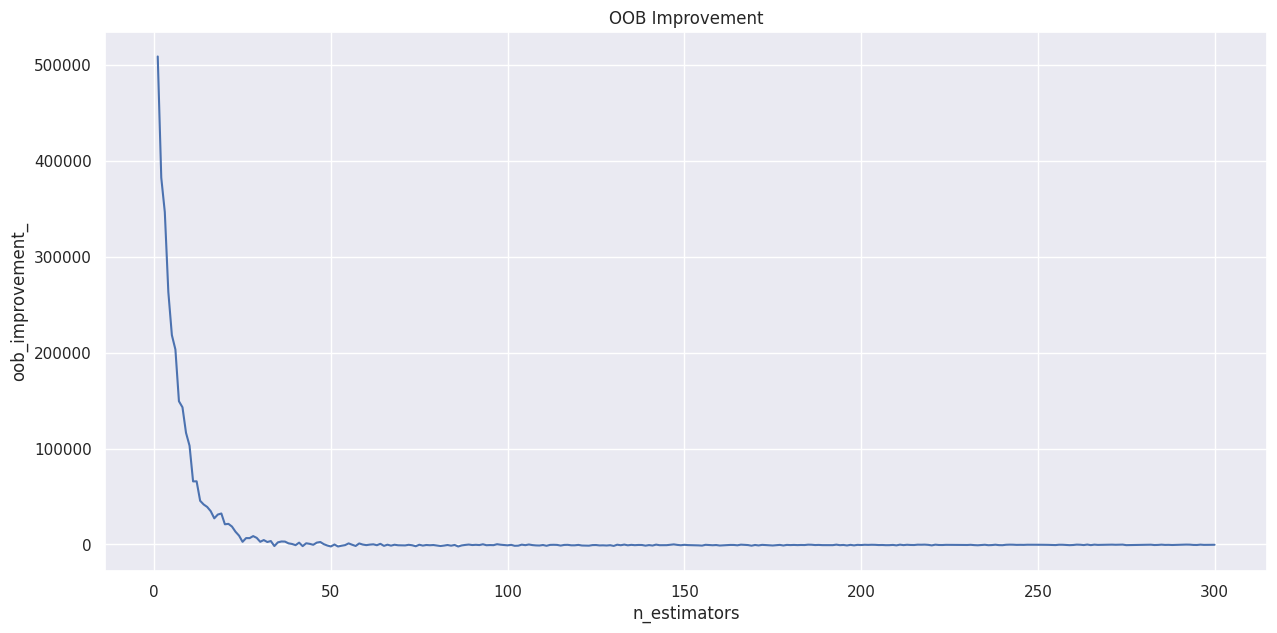

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(range(1, 301), gbr.oob_improvement_)
plt.xlabel("n_estimators")
plt.ylabel("oob_improvement_")
plt.title("OOB Improvement")
plt.show()

### 4.4 RandomizedSearchCV

In [ ]:
params = {
    "subsample": [0.65, 0.7, 0.75],
    "n_estimators": [300, 500, 1000],
    "learning_rate": [0.05, 0.075, 0.1],
}

# RandomizedSearchCV를 임포트합니다.
from sklearn.model_selection import RandomizedSearchCV

gbr = GradientBoostingRegressor(max_depth=3, random_state=2)


# RandomizedSearchCV를 초기화합니다.
rand_reg = RandomizedSearchCV(
    gbr,
    params,
    n_iter=10,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    random_state=2,
)

# X_train와 y_train로 rand_reg를 훈련합니다.
rand_reg.fit(X_train, y_train)

# 최상의 모델을 추출합니다.
best_model = rand_reg.best_estimator_

# 최상의 매개변수를 추출합니다.
best_params = rand_reg.best_params_

# 최상의 매개변수를 출력합니다.
print("최상의 매개변수:", best_params)

# 최상의 점수를 계산합니다.
best_score = np.sqrt(-rand_reg.best_score_)

# 최상의 점수를 출력합니다.
print("훈련 점수: {:.3f}".format(best_score))

# 테스트 세트에 대한 예측을 만듭니다.
y_pred = best_model.predict(X_test)

# 평균 제곱근 오차를 계산합니다.
rmse_test = MSE(y_test, y_pred) ** 0.5

# 평균 제곱근 오차를 출력합니다.
print("테스트 세트 점수: {:.3f}".format(rmse_test))

최상의 매개변수: {'subsample': 0.65, 'n_estimators': 300, 'learning_rate': 0.05}
훈련 점수: 636.200
테스트 세트 점수: 625.985


In [ ]:
gbr = GradientBoostingRegressor(
    max_depth=3, n_estimators=1600, subsample=0.75, learning_rate=0.02, random_state=2
)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred) ** 0.5

596.9544588974487

### 4.5 XGBoost

In [ ]:
# XGBRegressor를 임포트합니다.
from xgboost import XGBRegressor

# XGBRegressor를 초기화합니다.
xg_reg = XGBRegressor(
    max_depth=3, n_estimators=1600, eta=0.02, subsample=0.75, random_state=2
)

# 훈련 세트에서 xg_reg를 훈련합니다.
xg_reg.fit(X_train, y_train)

# 테스트 세트에 대한 예측을 만듭니다.
y_pred = xg_reg.predict(X_test)

# 평균 제곱근 오차를 계산합니다.
MSE(y_test, y_pred) ** 0.5

588.1964972637095